# Perceptron multicouches et Keras

Définition d'un perceptron multicouches à deux couches cachées pour la classification de données MNIST


## MNIST 

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)




# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tk
from tensorflow.keras import Sequential


from tensorflow.keras.layers import Input, Dense, Activation,Lambda
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam


2024-10-27 14:37:43.800883: E external/local_xla/xla/stream_executor/plugin_registry.cc:93] Invalid plugin kind specified: DNN
2024-10-27 14:37:43.848119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Données

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [3]:
(x_train, y_train), (x_test, y_test) =tk.datasets.mnist.load_data()

num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape((num_examples, num_input))/255
x_test  = x_test.reshape((num_test, num_input))/255

# normalisation



print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


Taille de la rétine :  784
Nombre d'exemples :  60000


# Réseau

## Paramètres du réseau

Dans un premier temps, on définit les paramètres du réseau : 
- 256 neurones cachés dans chaque couche cachée, 
- un apprentissage par batchs de taille 100
- 15 itérations pour l'apprentissage


In [15]:

lr = 0.001
num_epochs = 100
batch_size = 100

# Nombre de neurones sur les deux couches cachées
num_hidden_1 = 256 
num_hidden_2 = 256 

## Définition du réseau

On construit alors le modèle :
- le réseau
- la fonction de coût à optimiser : dans le cas d'un problème de classification, la fonction d'entropie croisée calculée entre la sortie théorique et la sortie calculée par le modèle est adéquate
- la méthode d'optimisation utilisée (descente de gradient) : ici, l'algorithme [ADAM](https://arxiv.org/abs/1412.6980) est utilisé

In [16]:
#TODO : réseau

model = Sequential()
model.add(Dense(num_hidden_1, input_shape=(num_input,), activation='relu'))
model.add(Dense(num_hidden_2, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-10-27 14:44:07.674130: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:07.675508: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:07.683313: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:07.685973: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:07.699324: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:07.700852: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [17]:
#TODO : optimiseur et fonction de perte
model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['acc'])

On entraîne le modèle

In [18]:
#TODO ;: entraînement
hist = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100


2024-10-27 14:44:11.275017: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:11.276749: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:11.284330: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:11.285364: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:11.291186: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:11.292284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:11.349028: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:11.349991: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:11.356891: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:44:11

 12/600 [..............................] - ETA: 2s - loss: 1.7246 - acc: 0.5317  

2024-10-27 14:44:11.708990: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


600/600 [==============================] - 3s 5ms/step - loss: 0.2446 - acc: 0.9286
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0905 - acc: 0.9722
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0614 - acc: 0.9811
Epoch 4/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0423 - acc: 0.9867
Epoch 5/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0325 - acc: 0.9893
Epoch 6/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0260 - acc: 0.9916
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.0214 - acc: 0.9930
Epoch 8/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0179 - acc: 0.9940
Epoch 9/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0154 - acc: 0.9948
Epoch 10/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0141 - acc: 0.9950
Epoch 11/100
600/600 [=============================

In [19]:
print("Précision ={0:5.3f} ".format(hist.history.get('acc')[-1]))

Précision =1.000 


Puis on l'évalue sur l'ensemble de test 

 11/313 [>.............................] - ETA: 1s - loss: 0.1765 - acc: 0.9830     

2024-10-27 14:48:28.151380: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:28.152627: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:28.159875: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:28.160893: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:28.169492: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:28.170632: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:28.178295: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:28.179091: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:28.184964: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:28

313/313 [==============================] - 2s 5ms/step - loss: 0.1958 - acc: 0.9824


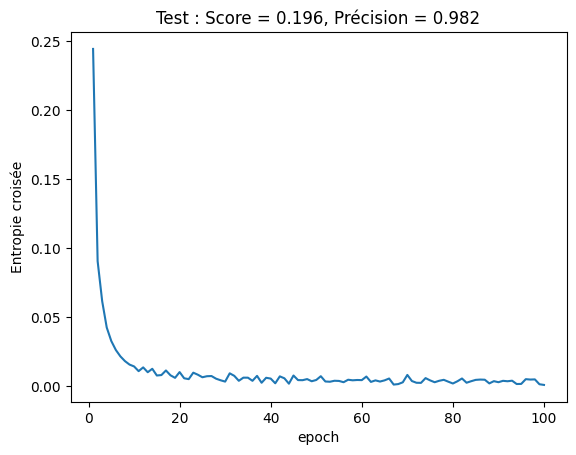

 49/313 [===>..........................] - ETA: 0s

2024-10-27 14:48:30.048355: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:30.049259: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:30.054585: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:30.055543: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:30.063674: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:30.064655: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:30.073307: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:30.074090: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:30.078642: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:48:30

313/313 [==============================] - 1s 2ms/step
Nombre d'erreurs 176/10000




<Figure size 640x480 with 0 Axes>

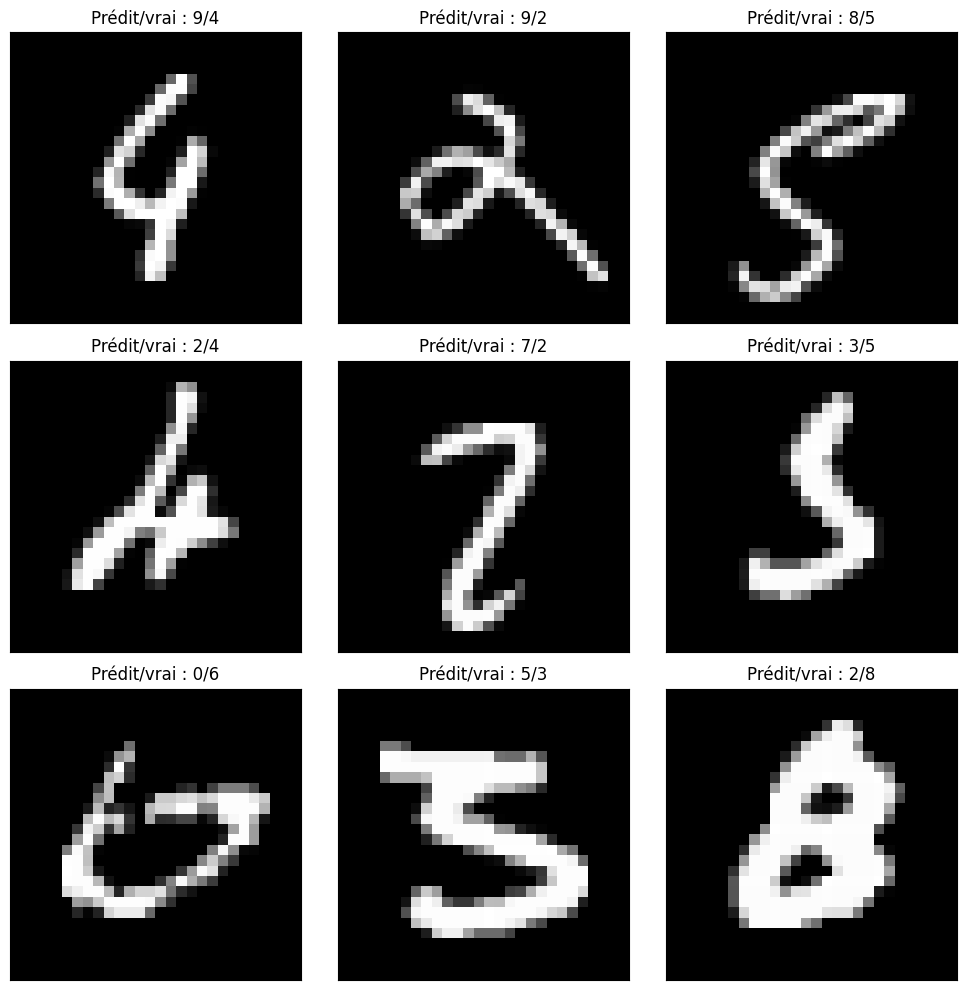

In [20]:
score = model.evaluate(x_test,y_test)

x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.subplots(1,1)
plt.xlabel('epoch')
plt.ylabel('Entropie croisée')
plt.title("Test : Score = {0:5.3f}, Précision = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prédit/vrai : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Nombre d'erreurs {}/{}\n\n".format(incorrects.size,y.size))
